In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import caffe
import cv2
caffe.set_mode_gpu()

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
net = caffe.Net('../models/autoencoder/md593_autoencoder_test.prototxt','../models/autoencoder/md593_autoencoder_iter_5000.caffemodel', caffe.TEST)


In [67]:
[(k, v[0].data.shape) for k, v in net.params.items()]

[('conv1', (16, 1, 5, 5)),
 ('conv2', (16, 16, 5, 5)),
 ('conv3', (32, 16, 5, 5)),
 ('conv4', (32, 32, 5, 5)),
 ('deconv4', (32, 32, 5, 5)),
 ('deconv3', (32, 16, 5, 5)),
 ('deconv2', (16, 16, 5, 5)),
 ('deconv1', (16, 1, 5, 5))]

In [68]:
[(k, v.data.shape) for k, v in net.blobs.items()]

[('data', (1, 1, 96, 96)),
 ('conv1', (1, 16, 92, 92)),
 ('conv2', (1, 16, 88, 88)),
 ('pool1', (1, 16, 44, 44)),
 ('pool1_mask', (1, 16, 44, 44)),
 ('conv3', (1, 32, 40, 40)),
 ('conv4', (1, 32, 36, 36)),
 ('pool2', (1, 32, 18, 18)),
 ('pool2_mask', (1, 32, 18, 18)),
 ('unpool2', (1, 32, 36, 36)),
 ('deconv4', (1, 32, 40, 40)),
 ('deconv3', (1, 16, 44, 44)),
 ('unpool1', (1, 16, 88, 88)),
 ('deconv2', (1, 16, 92, 92)),
 ('deconv1', (1, 1, 96, 96))]

In [69]:
def vis_square(data, padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data)

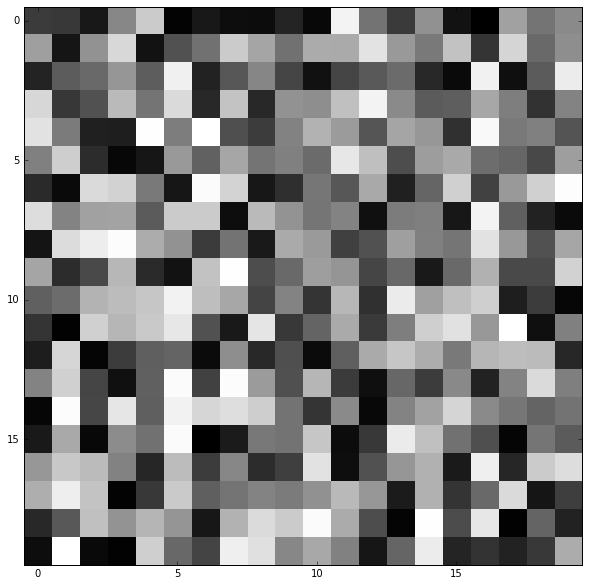

In [70]:
filters = net.params['conv1'][0].data.reshape(4, 4, 5, 5).transpose(0, 2, 1, 3).reshape(4*5, 4*5)
plt.imshow(filters)

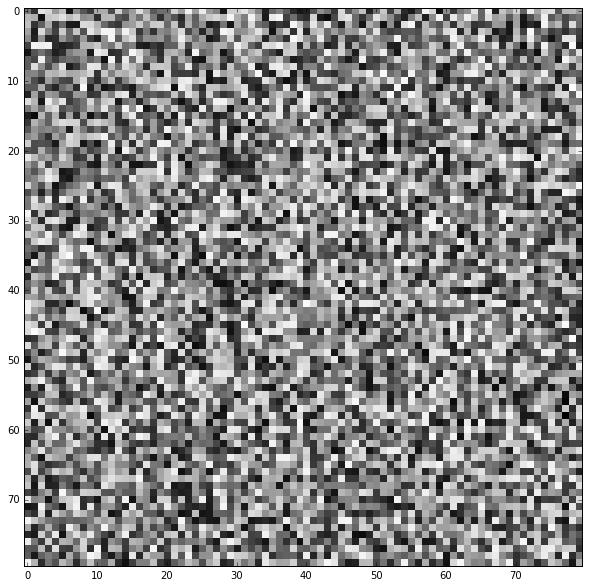

In [87]:
filters = net.params['conv2'][0].data.transpose(0, 2, 1, 3).reshape(16*5, 16*5)
plt.imshow(filters)

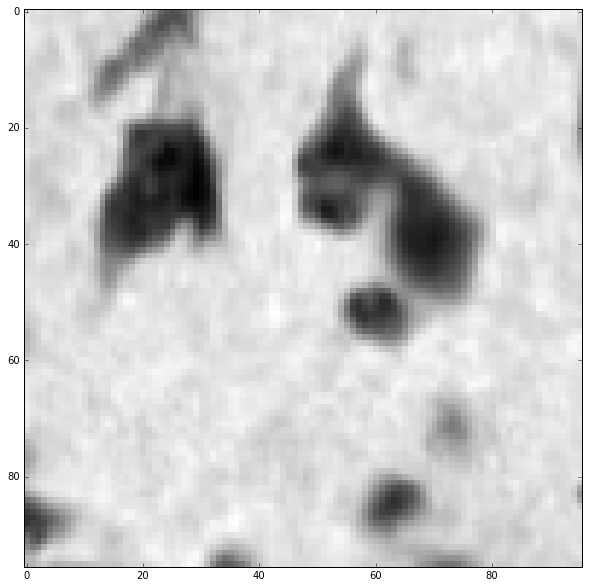

In [71]:
img = cv2.imread('../images/md593_test.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

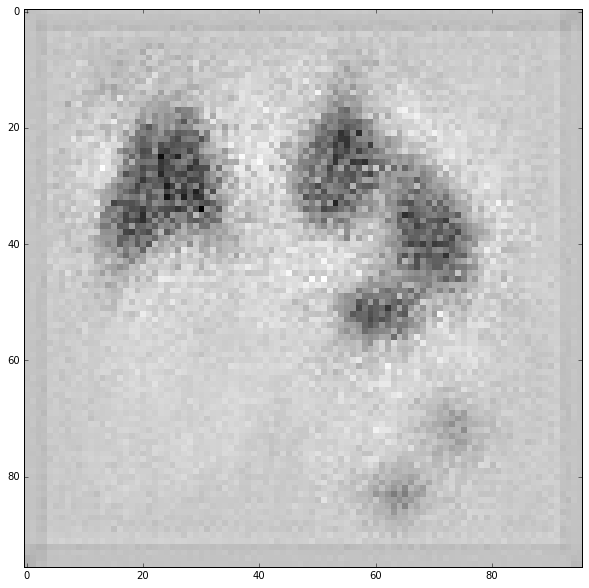

In [72]:
net.blobs['data'].data[...] = img * 0.00392156862
out = net.forward()
tmp = out['deconv1'].reshape(96,96)
plt.imshow(tmp)

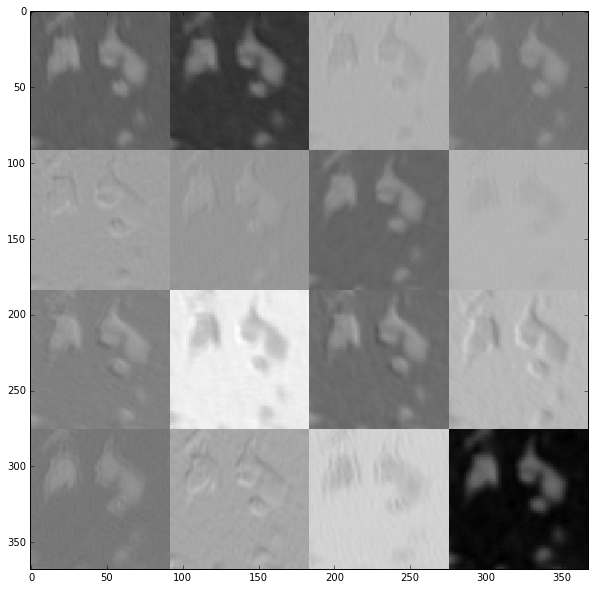

In [73]:
fMap = net.blobs['conv1'].data[0].reshape(4, 4, 92, 92).transpose(0, 2, 1, 3).reshape(4*92, 4*92)
plt.imshow(fMap)

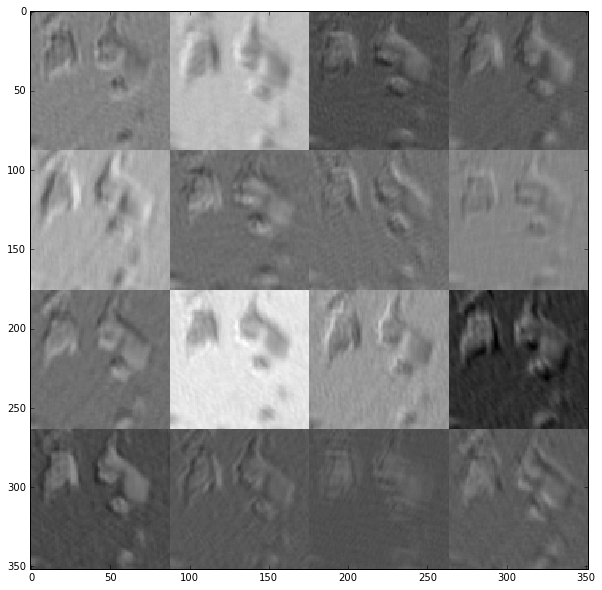

In [85]:
fMap = net.blobs['conv2'].data.reshape(4,4,88,88).transpose(0, 2, 1, 3).reshape(4*88, 4*88)
plt.imshow(fMap)

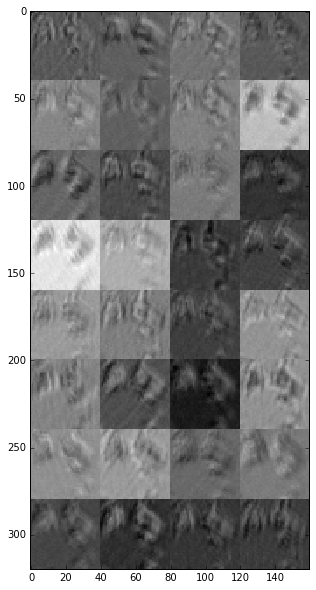

In [75]:
fMap = net.blobs['conv3'].data.reshape(8,4,40,40).transpose(0, 2, 1, 3).reshape(8*40, 4*40)
plt.imshow(fMap)                                                                

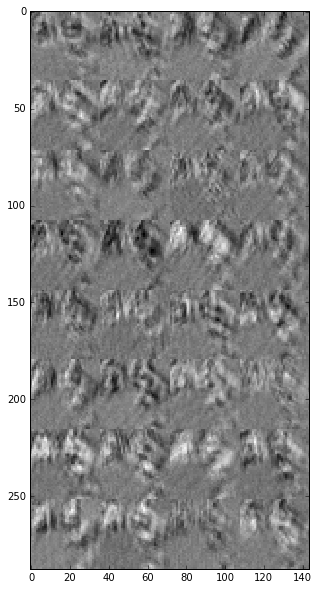

In [76]:
fMap = net.blobs['conv4'].data.reshape(8,4,36,36).transpose(0, 2, 1, 3).reshape(8*36, 4*36)
plt.imshow(fMap)                                                                

(1, 32, 18, 18)


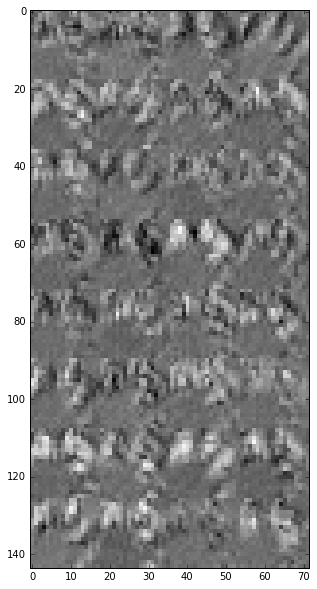

In [77]:
print net.blobs['pool2'].data.shape
fMap = net.blobs['pool2'].data.reshape(8,4,18,18).transpose(0, 2, 1, 3).reshape(8*18, 4*18)
plt.imshow(fMap)  

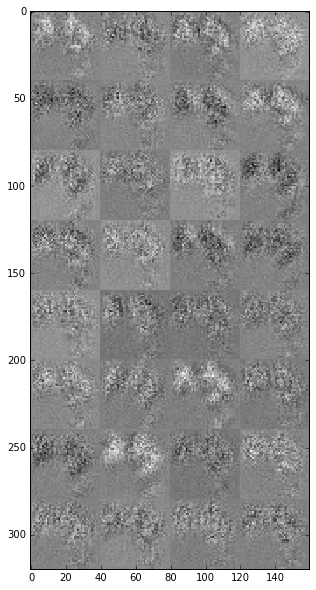

In [78]:
fMap = net.blobs['deconv4'].data.reshape(8,4,40,40).transpose(0, 2, 1, 3).reshape(8*40, 4*40)
plt.imshow(fMap)  

(1, 16, 44, 44)


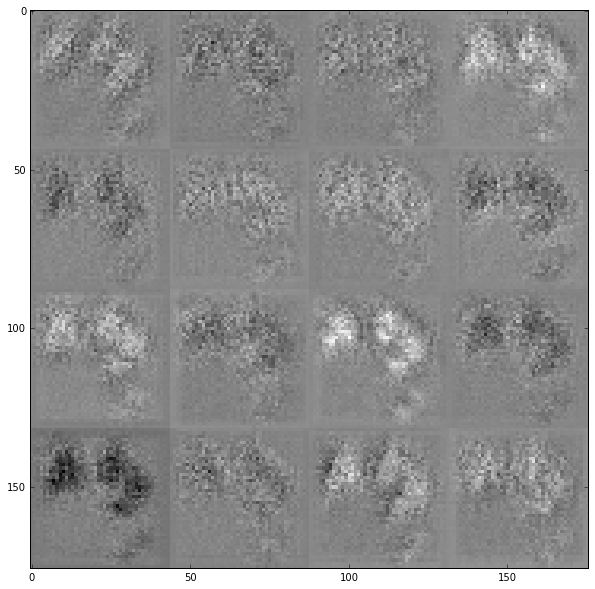

In [82]:
print net.blobs['deconv3'].data.shape
fMap = net.blobs['deconv3'].data.reshape(4,4,44,44).transpose(0, 2, 1, 3).reshape(4*44, 4*44)
plt.imshow(fMap)

(1, 16, 92, 92)


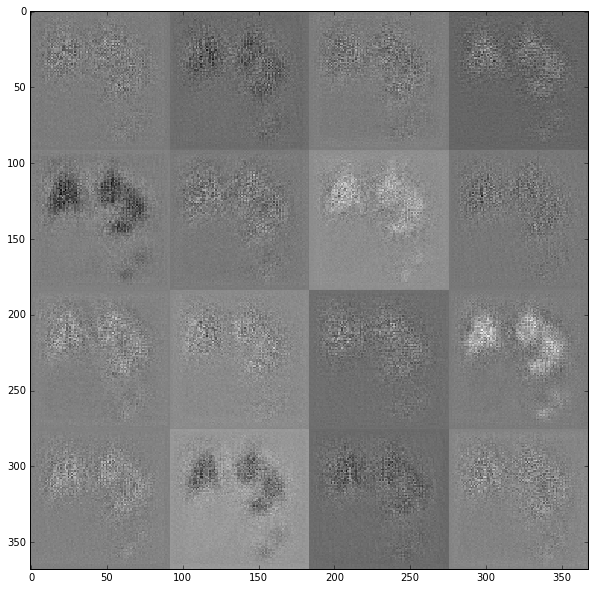

In [83]:
print net.blobs['deconv2'].data.shape
fMap = net.blobs['deconv2'].data.reshape(4,4,92,92).transpose(0, 2, 1, 3).reshape(4*92, 4*92)
plt.imshow(fMap)